<a href="https://colab.research.google.com/github/JackyXu866/Project-in-ML-AI/blob/main/hw5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1: CNN

## Preparation

The dataset I chose is MNIST-Fashion, which consists of clothing images 
in 10 categories. Each image is 28 by 28 and with only black and white
colors.

In [21]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [48]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [23]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


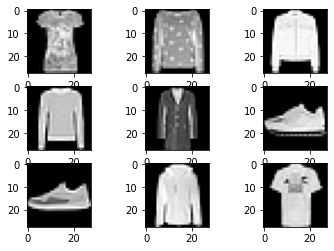

In [24]:
import random
for i in range(1, 10):
  plt.subplot(3, 3, i)
  plt.imshow(x_train[random.randint(0, x_train.shape[0])], cmap=plt.get_cmap('gray'))

In [49]:
# add color dimension
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

In [50]:
x_train.shape

(60000, 28, 28, 1)

In [ ]:
x_train = x_train/255
x_test = x_test/255

In [60]:
x_train.min(), x_train.max() 

(0.0, 1.0)

## Part 1: Homemade CNN

For my CNN model, I did 3 sets of Convolutional layer and Pooling layer.
Due to my dataset being so simple that is only 28 by 28 for each image, 
have more pooling layer could destroy the feature of that image. I started 
with a kernal size of 5x5 to extract the basic shape of the clothing, 
than i made the kernel size low to 3x3 to get detailed features.

After that I flatten out the result and used 3 sets of fully connected 
dense node to calculate weights and biases.

For measurements, I used the `sparse_categorical_crossentropy` as the loss, 
and `sparse_categorical_accuracy` as the metrics. The result went pretty well 
when predicting on the test set, that accuracy get around 90%.

In [61]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.optimizers import Adam

In [62]:
cnn = Sequential([
    Conv2D(16, (5,5), padding='same', activation='relu', input_shape=x_train.shape[1:]),
    MaxPooling2D(),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(256, (3,3), padding='same', activation='relu'),
    MaxPooling2D(),

    Flatten(),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(10, activation="softmax")
])

In [63]:
cnn.compile(optimizer=Adam(learning_rate=1e-3),
      loss='sparse_categorical_crossentropy',
      metrics=['sparse_categorical_accuracy'])

In [64]:
cnn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 16)        416       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 64)        9280      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 7, 7, 256)         147712    
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 3, 3, 256)       

In [65]:
history = cnn.fit(
    x_train.astype(np.float32), y_train.astype(np.float32),
    epochs=10,
    steps_per_epoch=100,
    validation_split=0.1
)

Epoch 1/10
100/100 [==============================] - 3s 26ms/step - loss: 0.7831 - sparse_categorical_accuracy: 0.7131 - val_loss: 0.4973 - val_sparse_categorical_accuracy: 0.8263
Epoch 2/10
100/100 [==============================] - 2s 24ms/step - loss: 0.4198 - sparse_categorical_accuracy: 0.8490 - val_loss: 0.3731 - val_sparse_categorical_accuracy: 0.8655
Epoch 3/10
100/100 [==============================] - 2s 22ms/step - loss: 0.3492 - sparse_categorical_accuracy: 0.8740 - val_loss: 0.3447 - val_sparse_categorical_accuracy: 0.8787
Epoch 4/10
100/100 [==============================] - 2s 22ms/step - loss: 0.3122 - sparse_categorical_accuracy: 0.8877 - val_loss: 0.3602 - val_sparse_categorical_accuracy: 0.8693
Epoch 5/10
100/100 [==============================] - 2s 24ms/step - loss: 0.2885 - sparse_categorical_accuracy: 0.8956 - val_loss: 0.3063 - val_sparse_categorical_accuracy: 0.8897
Epoch 6/10
100/100 [==============================] - 2s 24ms/step - loss: 0.2612 - sparse_cate

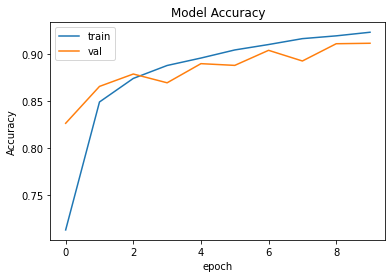

In [66]:
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

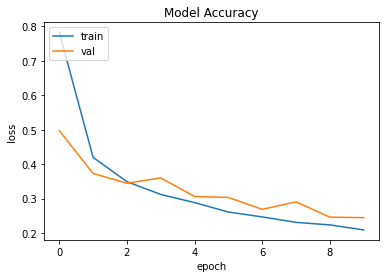

In [67]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [68]:
y_pred = cnn.predict(x_test.astype(np.float32))
y_pred

313/313 [==============================] - 1s 2ms/step


array([[3.5416333e-06, 2.6260743e-06, 4.1264016e-06, ..., 5.8401613e-03,
        1.6970320e-04, 9.9231625e-01],
       [2.9482295e-05, 1.5692317e-08, 9.9982649e-01, ..., 1.6129057e-14,
        1.3229185e-08, 1.4215215e-09],
       [1.1738642e-06, 9.9999619e-01, 2.0872337e-08, ..., 1.4605324e-12,
        3.5820523e-08, 4.6360632e-10],
       ...,
       [2.0235153e-05, 1.4873220e-08, 7.2219841e-06, ..., 6.6739332e-08,
        9.9987507e-01, 3.5186066e-08],
       [3.7109374e-05, 9.9993908e-01, 2.3294374e-06, ..., 9.3706998e-10,
        1.3825435e-08, 5.7053889e-08],
       [2.8757122e-03, 1.8201319e-04, 1.6959988e-03, ..., 8.0838114e-02,
        1.2199750e-02, 9.1446342e-04]], dtype=float32)

In [69]:
count = 0
a = True
for i in range(len(y_pred)):
  if np.argmax(y_pred[i]) == y_test[i]:
    count += 1

acc = count/y_test.shape[0]
acc

0.9094

## Part 2: VGG

I used the VGG16 as a pre-trained model for the dataset. This model consists
much more convolutional layer than mine. However, the overall accuracy is a
little worse than mine. I think it is because the images in dataset are too
small, so it mis-catch the features with that many convolutional layers.

The training curve is much more gentle in VGG16, and the validation set gets
relatively better accuracy and loss, so I think it is able to fit more kinds
of images than my model. In addition, I only ran the model for 10 epochs,
I think if there are more epochs the accuracy could be increased.

In [107]:
from tensorflow.config import list_physical_devices

In [108]:
print("GPUs Available: ", list_physical_devices('GPU'))

GPUs Available:  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [109]:
from tensorflow.keras.applications import VGG16

In [110]:
# vgg requires 3 channel and >32 size
(x_train1, y_train1), (x_test1, y_test1) = fashion_mnist.load_data()

In [111]:
x_train1=np.dstack([x_train1]*3)
x_test1=np.dstack([x_test1]*3)

In [112]:
x_train1.shape, x_test1.shape

((60000, 28, 84), (10000, 28, 84))

In [113]:
x_train1 = x_train1.reshape(-1,28,28,3)
x_test1 = x_test1.reshape(-1,28,28,3)
x_train1.shape,x_test1.shape

((60000, 28, 28, 3), (10000, 28, 28, 3))

In [114]:
from tensorflow.keras.preprocessing.image import img_to_array, array_to_img
x_train1 = np.asarray([img_to_array(array_to_img(im, scale=False).resize((32,32))) for im in x_train1])
x_test1 = np.asarray([img_to_array(array_to_img(im, scale=False).resize((32,32))) for im in x_test1])
x_train1.shape, x_test1.shape

((60000, 32, 32, 3), (10000, 32, 32, 3))

In [115]:
x_train1 = x_train1/255
x_test1 = x_test1/255

In [116]:
vgg = VGG16(include_top=False, input_shape=x_train1.shape[1:], classes=10)

In [117]:
# add dense layer
x = Flatten()(vgg.output)
x = Dense(1024, activation='relu')(x)
x = Dense(512, activation='relu')(x)
x = Dense(10, activation='softmax')(x)

In [118]:
vgg_new = Model(inputs=vgg.input, outputs=x)

In [119]:
vgg_new.compile(optimizer=Adam(learning_rate=1e-3),
      loss='sparse_categorical_crossentropy',
      metrics=['sparse_categorical_accuracy'])

In [120]:
vgg_new.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0   

In [121]:
history_v = vgg_new.fit(
    x_train1.astype(np.float32), y_train1.astype(np.float32),
    epochs=10,
    steps_per_epoch=100,
    validation_split=0.1
)

Epoch 1/10
100/100 [==============================] - 21s 202ms/step - loss: 1.6222 - sparse_categorical_accuracy: 0.3757 - val_loss: 0.9530 - val_sparse_categorical_accuracy: 0.5992
Epoch 2/10
100/100 [==============================] - 20s 198ms/step - loss: 0.7371 - sparse_categorical_accuracy: 0.7077 - val_loss: 0.6125 - val_sparse_categorical_accuracy: 0.7733
Epoch 3/10
100/100 [==============================] - 20s 198ms/step - loss: 0.5138 - sparse_categorical_accuracy: 0.8165 - val_loss: 0.4253 - val_sparse_categorical_accuracy: 0.8502
Epoch 4/10
100/100 [==============================] - 20s 197ms/step - loss: 0.4268 - sparse_categorical_accuracy: 0.8478 - val_loss: 0.3742 - val_sparse_categorical_accuracy: 0.8638
Epoch 5/10
100/100 [==============================] - 20s 196ms/step - loss: 0.3356 - sparse_categorical_accuracy: 0.8799 - val_loss: 0.3265 - val_sparse_categorical_accuracy: 0.8847
Epoch 6/10
100/100 [==============================] - 20s 197ms/step - loss: 0.3000 -

In [122]:
!nvidia-smi

Fri Nov  4 23:19:36 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   74C    P0    33W /  70W |   9202MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

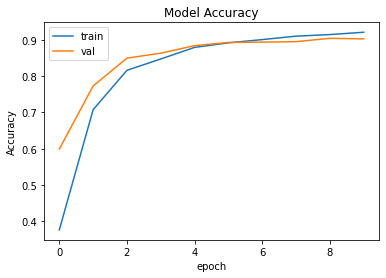

In [123]:
plt.plot(history_v.history['sparse_categorical_accuracy'])
plt.plot(history_v.history['val_sparse_categorical_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

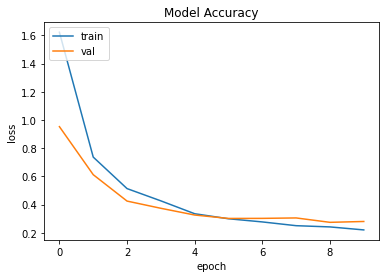

In [124]:
plt.plot(history_v.history['loss'])
plt.plot(history_v.history['val_loss'])
plt.title('Model Accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [125]:
y_pred1 = vgg_new.predict(x_test1.astype(np.float32))
y_pred1

313/313 [==============================] - 3s 8ms/step


array([[1.0437261e-07, 3.7742662e-09, 7.2898683e-07, ..., 2.8804890e-04,
        3.9297639e-08, 9.9906367e-01],
       [1.8782815e-03, 8.9109599e-05, 9.8199940e-01, ..., 2.4369595e-07,
        9.7010470e-06, 3.6247931e-07],
       [2.1085671e-07, 9.9998891e-01, 3.6372433e-07, ..., 1.3776336e-13,
        4.5275911e-10, 4.8309064e-14],
       ...,
       [9.2022136e-05, 1.6070247e-06, 4.0532973e-06, ..., 9.5181249e-06,
        9.9985254e-01, 2.2949534e-06],
       [4.3739706e-07, 9.9997818e-01, 1.1072264e-06, ..., 1.0928278e-12,
        1.8803297e-09, 3.7741557e-13],
       [5.8098864e-05, 1.7202605e-06, 2.6255966e-06, ..., 7.4961722e-01,
        8.9149733e-05, 6.8808818e-04]], dtype=float32)

In [126]:
count = 0
a = True
for i in range(len(y_pred1)):
  if np.argmax(y_pred1[i]) == y_test1[i]:
    count += 1

acc = count/y_test1.shape[0]
acc

0.9019

## Part 3: Data Augmentation

When I apply the data augmentation to the dataset using my CNN model. 
The accuracy decreased a bit, however, it works relatively better on the 
test and validation set. Because of much variants of images are trained, 
its ability to adapt to different images is better.

In [53]:
x_train.min(), x_train.max() 

(0.0, 1.0)

In [54]:
from tensorflow.keras.layers import RandomFlip, RandomRotation
data_augmentation = Sequential([
    RandomFlip(),
    RandomRotation(0.2),
])

In [56]:
x_train.shape

(60000, 28, 28, 1)

In [57]:
aug_cnn = Sequential([
    data_augmentation,
    cnn,
])

In [58]:
aug_cnn.compile(optimizer=Adam(learning_rate=1e-3),
      loss='sparse_categorical_crossentropy',
      metrics=['sparse_categorical_accuracy'])

In [59]:
history_aug = aug_cnn.fit(
    x_train.astype(np.float32), y_train.astype(np.float32),
    epochs=10,
    steps_per_epoch=100,
    validation_split=0.1
)

Epoch 1/10
100/100 [==============================] - 39s 379ms/step - loss: 1.3010 - sparse_categorical_accuracy: 0.5327 - val_loss: 0.8160 - val_sparse_categorical_accuracy: 0.7035
Epoch 2/10
100/100 [==============================] - 37s 371ms/step - loss: 0.8651 - sparse_categorical_accuracy: 0.6788 - val_loss: 0.6838 - val_sparse_categorical_accuracy: 0.7380
Epoch 3/10
100/100 [==============================] - 37s 369ms/step - loss: 0.7578 - sparse_categorical_accuracy: 0.7182 - val_loss: 0.7098 - val_sparse_categorical_accuracy: 0.7288
Epoch 4/10
100/100 [==============================] - 36s 364ms/step - loss: 0.6976 - sparse_categorical_accuracy: 0.7428 - val_loss: 0.6062 - val_sparse_categorical_accuracy: 0.7728
Epoch 5/10
100/100 [==============================] - 37s 368ms/step - loss: 0.6434 - sparse_categorical_accuracy: 0.7656 - val_loss: 0.6046 - val_sparse_categorical_accuracy: 0.7712
Epoch 6/10
100/100 [==============================] - 39s 390ms/step - loss: 0.6089 -

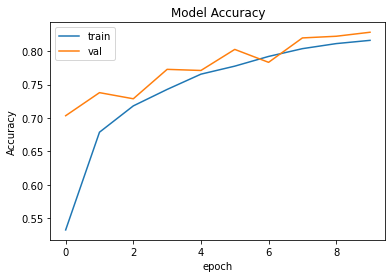

In [70]:
plt.plot(history_aug.history['sparse_categorical_accuracy'])
plt.plot(history_aug.history['val_sparse_categorical_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

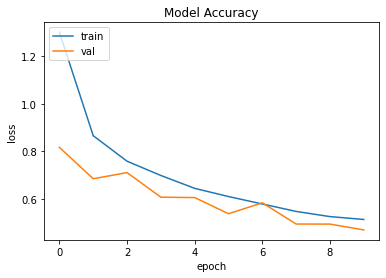

In [71]:
plt.plot(history_aug.history['loss'])
plt.plot(history_aug.history['val_loss'])
plt.title('Model Accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [194]:
y_pred_a = aug_cnn.predict(x_test.astype(np.float32))
y_pred_a

313/313 [==============================] - 1s 3ms/step


array([[4.7957519e-06, 3.7109005e-09, 4.5337225e-07, ..., 7.0275687e-02,
        1.5407316e-04, 9.1949457e-01],
       [5.9649876e-05, 9.1547395e-07, 9.8846453e-01, ..., 6.6684054e-11,
        4.7452263e-06, 1.8206510e-10],
       [1.2793985e-06, 9.9997985e-01, 7.0001867e-08, ..., 2.5484952e-09,
        1.1499398e-05, 1.9019940e-12],
       ...,
       [2.5242094e-05, 1.1714143e-06, 5.6727117e-06, ..., 1.5191965e-06,
        9.9965513e-01, 5.3273658e-07],
       [4.1284216e-06, 9.9399757e-01, 1.7034824e-06, ..., 4.0339219e-06,
        7.2407260e-05, 5.9458087e-09],
       [2.3908245e-03, 2.5450668e-06, 5.9411279e-04, ..., 8.0069500e-01,
        3.1125130e-02, 2.7099990e-03]], dtype=float32)

In [195]:
count = 0
a = True
for i in range(len(y_pred_a)):
  if np.argmax(y_pred[i]) == y_test[i]:
    count += 1

acc = count/y_test.shape[0]
acc

0.9094

# Task 2

## Part 1: VAE
https://www.tensorflow.org/tutorials/generative/cvae

In [165]:
import tensorflow as tf
import tensorflow_probability as tfp
from IPython import display

In [155]:
class CVAE(tf.keras.Model):
  """Convolutional variational autoencoder."""

  def __init__(self, latent_dim):
    super(CVAE, self).__init__()
    self.latent_dim = latent_dim
    self.encoder = tf.keras.Sequential(
        [
            tf.keras.layers.InputLayer(input_shape=(28, 28, 1)),
            tf.keras.layers.Conv2D(
                filters=32, kernel_size=3, strides=(2, 2), activation='relu'),
            tf.keras.layers.Conv2D(
                filters=64, kernel_size=3, strides=(2, 2), activation='relu'),
            tf.keras.layers.Flatten(),
            # No activation
            tf.keras.layers.Dense(latent_dim + latent_dim),
        ]
    )

    self.decoder = tf.keras.Sequential(
        [
            tf.keras.layers.InputLayer(input_shape=(latent_dim,)),
            tf.keras.layers.Dense(units=7*7*32, activation=tf.nn.relu),
            tf.keras.layers.Reshape(target_shape=(7, 7, 32)),
            tf.keras.layers.Conv2DTranspose(
                filters=64, kernel_size=3, strides=2, padding='same',
                activation='relu'),
            tf.keras.layers.Conv2DTranspose(
                filters=32, kernel_size=3, strides=2, padding='same',
                activation='relu'),
            # No activation
            tf.keras.layers.Conv2DTranspose(
                filters=1, kernel_size=3, strides=1, padding='same'),
        ]
    )

  @tf.function
  def sample(self, eps=None):
    if eps is None:
      eps = tf.random.normal(shape=(100, self.latent_dim))
    return self.decode(eps, apply_sigmoid=True)

  def encode(self, x):
    mean, logvar = tf.split(self.encoder(x), num_or_size_splits=2, axis=1)
    return mean, logvar

  def reparameterize(self, mean, logvar):
    eps = tf.random.normal(shape=mean.shape)
    return eps * tf.exp(logvar * .5) + mean

  def decode(self, z, apply_sigmoid=False):
    logits = self.decoder(z)
    if apply_sigmoid:
      probs = tf.sigmoid(logits)
      return probs
    return logits

In [156]:
optimizer = tf.keras.optimizers.Adam(1e-4)


def log_normal_pdf(sample, mean, logvar, raxis=1):
  log2pi = tf.math.log(2. * np.pi)
  return tf.reduce_sum(
      -.5 * ((sample - mean) ** 2. * tf.exp(-logvar) + logvar + log2pi),
      axis=raxis)


def compute_loss(model, x):
  mean, logvar = model.encode(x)
  z = model.reparameterize(mean, logvar)
  x_logit = model.decode(z)
  cross_ent = tf.nn.sigmoid_cross_entropy_with_logits(logits=x_logit, labels=x)
  logpx_z = -tf.reduce_sum(cross_ent, axis=[1, 2, 3])
  logpz = log_normal_pdf(z, 0., 0.)
  logqz_x = log_normal_pdf(z, mean, logvar)
  return -tf.reduce_mean(logpx_z + logpz - logqz_x)


@tf.function
def train_step(model, x, optimizer):
  """Executes one training step and returns the loss.

  This function computes the loss and gradients, and uses the latter to
  update the model's parameters.
  """
  with tf.GradientTape() as tape:
    loss = compute_loss(model, x)
  gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(zip(gradients, model.trainable_variables))

In [157]:
epochs = 10
# set the dimensionality of the latent space to a plane for visualization later
latent_dim = 2
num_examples_to_generate = 16

# keeping the random vector constant for generation (prediction) so
# it will be easier to see the improvement.
random_vector_for_generation = tf.random.normal(
    shape=[num_examples_to_generate, latent_dim])
model = CVAE(latent_dim)

In [158]:
def generate_and_save_images(model, epoch, test_sample):
  mean, logvar = model.encode(test_sample)
  z = model.reparameterize(mean, logvar)
  predictions = model.sample(z)
  fig = plt.figure(figsize=(4, 4))

  for i in range(predictions.shape[0]):
    plt.subplot(4, 4, i + 1)
    plt.imshow(predictions[i, :, :, 0], cmap='gray')
    plt.axis('off')

  # tight_layout minimizes the overlap between 2 sub-plots
  # plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
  plt.show()

In [159]:
batch_size = 32
train_size = x_train.shape[0]
test_size = x_test.shape[0]
train_dataset = (tf.data.Dataset.from_tensor_slices(x_train.astype(np.float32))
                 .shuffle(train_size).batch(batch_size))
test_dataset = (tf.data.Dataset.from_tensor_slices(x_test.astype(np.float32))
                .shuffle(test_size).batch(batch_size))

In [160]:
x_train.shape

(60000, 28, 28, 1)

In [161]:
# Pick a sample of the test set for generating output images
assert batch_size >= num_examples_to_generate
for test_batch in test_dataset.take(1):
  test_sample = test_batch[0:num_examples_to_generate, :, :, :]

Epoch: 10, Test set ELBO: -267.5957946777344


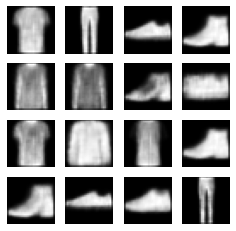

In [168]:
generate_and_save_images(model, 0, test_sample)

for epoch in range(1, epochs + 1):
  for train_x in train_dataset:
    train_step(model, train_x, optimizer)

  loss = tf.keras.metrics.Mean()
  for test_x in test_dataset:
    loss(compute_loss(model, test_x))
  elbo = -loss.result()
  clear_output(wait=False)
  print('Epoch: {}, Test set ELBO: {}'
        .format(epoch, elbo))
  generate_and_save_images(model, epoch, test_sample)

## Part 2: GAN
https://www.tensorflow.org/tutorials/generative/dcgan

In [173]:
from tensorflow.keras import layers

In [174]:
def make_generator_model():
    model = tf.keras.Sequential()
    model.add(layers.Dense(7*7*256, use_bias=False, input_shape=(100,)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Reshape((7, 7, 256)))
    assert model.output_shape == (None, 7, 7, 256)  # Note: None is the batch size

    model.add(layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False))
    assert model.output_shape == (None, 7, 7, 128)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    assert model.output_shape == (None, 14, 14, 64)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))
    assert model.output_shape == (None, 28, 28, 1)

    return model

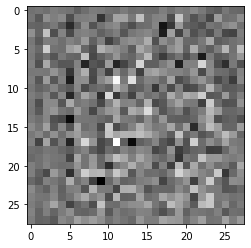

In [175]:
generator = make_generator_model()

noise = tf.random.normal([1, 100])
generated_image = generator(noise, training=False)

plt.imshow(generated_image[0, :, :, 0], cmap='gray')

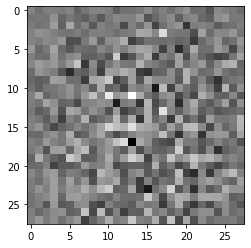

In [176]:
generator = make_generator_model()

noise = tf.random.normal([1, 100])
generated_image = generator(noise, training=False)

plt.imshow(generated_image[0, :, :, 0], cmap='gray')

In [177]:
def make_discriminator_model():
    model = tf.keras.Sequential()
    model.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same',
                                     input_shape=[28, 28, 1]))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Flatten())
    model.add(layers.Dense(1))

    return model

In [178]:
discriminator = make_discriminator_model()
decision = discriminator(generated_image)
print (decision)

tf.Tensor([[-0.00209515]], shape=(1, 1), dtype=float32)


In [179]:
# This method returns a helper function to compute cross entropy loss
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [180]:
def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

In [181]:
def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

In [182]:
EPOCHS = 50
noise_dim = 100
num_examples_to_generate = 16

# You will reuse this seed overtime (so it's easier)
# to visualize progress in the animated GIF)
seed = tf.random.normal([num_examples_to_generate, noise_dim])

In [189]:
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

In [190]:
# Notice the use of `tf.function`
# This annotation causes the function to be "compiled".
@tf.function
def train_step(images):
    noise = tf.random.normal([batch_size, noise_dim])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
      generated_images = generator(noise, training=True)

      real_output = discriminator(images, training=True)
      fake_output = discriminator(generated_images, training=True)

      gen_loss = generator_loss(fake_output)
      disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

In [186]:
def generate_and_save_images(model, epoch, test_input):
  # Notice `training` is set to False.
  # This is so all layers run in inference mode (batchnorm).
  predictions = model(test_input, training=False)

  fig = plt.figure(figsize=(4, 4))

  for i in range(predictions.shape[0]):
      plt.subplot(4, 4, i+1)
      plt.imshow(predictions[i, :, :, 0] * 256, cmap='gray')
      plt.axis('off')

  plt.show()

In [192]:
def train(dataset, epochs):
  for epoch in range(epochs):

    for image_batch in dataset:
      train_step(image_batch)

    # Produce images for the GIF as you go
    clear_output(wait=True)
    generate_and_save_images(generator,
                             epoch + 1,
                             seed)



  # Generate after the final epoch
  clear_output(wait=True)
  generate_and_save_images(generator,
                           epochs,
                           seed)

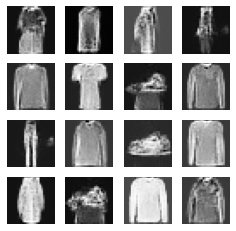

In [193]:
train(train_dataset, EPOCHS)

# Task 3: Project

Our group is doing crowd counting with CNN. Our current progress is on 
research article reading and data analysis. Each of the group member is 
assigned a different dataset to analysis on, because we want our model 
to fit with different resolution and angle of the image. I am working 
on the [Shanghai Tech part A](https://www.kaggle.com/datasets/tthien/shanghaitech), just analysising and exploring. In the next meeting this 
weekend, we are going to decide what kind of labelling method we should 
use based on all of the exploration of different dataset. For the model
library, we are going to use pytorch.